In [72]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
words = stopwords.words("english")
stemmer = SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
stopwords_set = set(stopwords.words("english"))
df = pd.read_csv('1429_1.csv', keep_default_na=False, skip_blank_lines=False)
df = df.replace(np.nan, '', regex=True)

C:\Users\pishi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
df['newComments'] = df[['reviews.text', 'reviews.title']].apply(lambda x: ' '.join(x), axis=1)
df['newComments'] = df['reviews.text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stopwords_set]).lower())
TVec = TfidfVectorizer(sublinear_tf=True, min_df=6, stop_words='english')
ch2 = SelectPercentile(chi2, percentile=9.5)
X_text_processing = TVec.fit_transform(df['newComments'])

#df['reviews.rating'].astype(str).astype(int).astype(float)
#df['reviews.rating'].convert_objects(convert_numeric=True)
df['reviews.rating'] = pd.to_numeric(df['reviews.rating'],errors='coerce')

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df[['reviews.rating']])
df['reviews.rating']=imp.transform(df[['reviews.rating']]).ravel()
'''
imputed_DF = pd.DataFrame(imp.fit_transform(df.loc[:, 14]))
imputed_DF.columns = df.columns
imputed_DF.index = df.index
'''
y_text_processing = df['reviews.rating'].astype(np.int64)

In [75]:
df['newComments']

0        this product far disappoint my children love u...
1           great beginn experienc person bought gift love
2        inexpens tablet use learn step nabi he thrill ...
3        i fire hd two week i love this tablet great va...
4        i bought grand daughter come visit i set user ...
5        this amazon fire inch tablet perfect size i pu...
6        great e read go nice light weight price point ...
7        i gave christma gift inlaw husband uncl they l...
8        great devic read book i like link borrow libra...
9                            i love order book read reader
10                         not easi elder user ceas ad pop
11       excel product easi use larg screen make watch ...
12       want father first tablet good valu he watch mo...
13       simpli everyth i need thank youand silk work w...
14                            got present love size screen
15       the kindl easiest use graphic screen crisp cle...
16       nice reader almost perfect want need good barga

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import array
vect = CountVectorizer(binary=True, stop_words=stopwords.words('english'), lowercase=True, min_df=6,  max_features=5000)
label_encoder_y = LabelEncoder()
y_recommended = df['reviews.doRecommend']


#df['reviews.doRecommend'].eq('TRUE').mul(1)
df['reviews.doRecommend'] = df['reviews.doRecommend'].apply(lambda x: 1 if x == "TRUE" else x)
df['reviews.doRecommend'] = df['reviews.doRecommend'].apply(lambda x: 0 if x == "FALSE" else x)
df['reviews.doRecommend'] = df['reviews.doRecommend'].replace(np.nan, '', regex=True)
df['reviews.doRecommend'] = df['reviews.doRecommend'].apply(lambda x: 0 if x == '' else x)

#print(onehot_encoded)
y_keras = df['reviews.doRecommend']


X_train, X_test, y_train, y_test = train_test_split(df['newComments'], y_keras, test_size=0.2)
X_train = vect.fit_transform(X_train_kera)
X_test = vect.transform(X_test_kera)

In [77]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [78]:
print(neigh.predict(X_test))

[1.  0.5 1.  ... 1.  1.  1. ]


In [123]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

RSME_values = []
for k in range(10):
    k += 1
    
    neigh = KNeighborsRegressor(n_neighbors = k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    err = sqrt(mean_squared_error(y_pred, y_test))
    RSME_values.append(err)
    print('RSME value for k = ', k , 'is:', err)

RSME value for k =  1 is: 0.3300229931313631
RSME value for k =  2 is: 0.28135717166908136
RSME value for k =  3 is: 0.26620102642882015
RSME value for k =  4 is: 0.2636903533001217
RSME value for k =  5 is: 0.25685073946913134
RSME value for k =  6 is: 0.252138700862551
RSME value for k =  7 is: 0.24969215710988038
RSME value for k =  8 is: 0.24776754964181785
RSME value for k =  9 is: 0.24679057367899743
RSME value for k =  10 is: 0.24531972143343414


In [124]:
kNN_rsme = np.mean(RSME_values)
print(kNN_rsme)

0.26398309867251984


Text(0,0.5,'RSME Value')

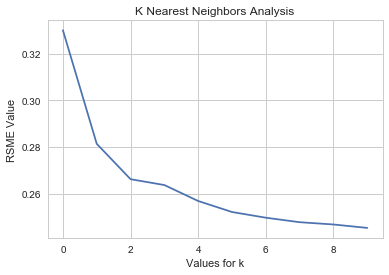

In [125]:
plt.plot(RSME_values)
plt.title("K Nearest Neighbors Analysis")
plt.xlabel('Values for k')
plt.ylabel('RSME Value')

In [126]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train.toarray(), y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [127]:
y_pred = reg.predict(X_test)

In [128]:
reg.coef_

array([ 4.94102023e-05,  2.30717323e-04, -9.98538573e-05, ...,
        6.98324393e-06,  2.03901031e-05, -3.06398830e-05])

Text(0.5,1,'Weights of Model')

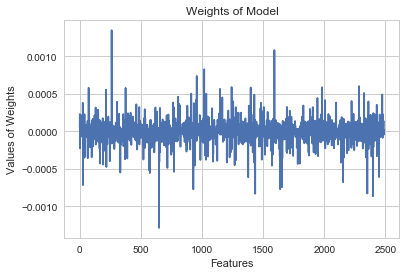

In [129]:
plt.plot(reg.coef_)
plt.xlabel('Features')
plt.ylabel('Values of Weights')
plt.title('Weights of Model')

In [132]:
bayesian_rsme = sqrt(mean_squared_error(y_pred, y_test))
print(bayesian_rsme)

0.23591742926881212


In [133]:
### classification

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial').fit(X_train, y_train)

In [134]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [135]:
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

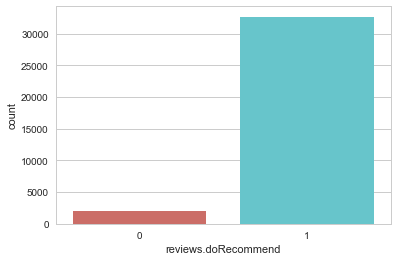

In [136]:
sns.countplot(x = y_keras, data = df, palette = 'hls')

In [137]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter = 1000, tol = 1e-3)
clf.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [138]:
clf.predict(X_test)

array([0.63975135, 0.79263299, 1.04428971, ..., 0.74889565, 0.65443352,
       0.91825959])

In [141]:
y_pred = clf.predict(X_test)
err = sqrt(mean_squared_error(y_pred, y_test))
print(err)

0.3362097980084293


In [146]:
SGD_RSME_values = []
it = 0

for k in range(10):
    it += 1000000
    
    clf = linear_model.SGDRegressor(max_iter = it, tol = 1e-3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    err = sqrt(mean_squared_error(y_pred, y_test))
    SGD_RSME_values.append(err)
    print('RSME value for max_iter = ', it , 'is:', err)

RSME value for max_iter =  1000000 is: 0.33621478816338474
RSME value for max_iter =  2000000 is: 0.3363869797033507
RSME value for max_iter =  3000000 is: 0.3360860880869497
RSME value for max_iter =  4000000 is: 0.33606436913618726
RSME value for max_iter =  5000000 is: 0.33613114872816097
RSME value for max_iter =  6000000 is: 0.3362943115271109
RSME value for max_iter =  7000000 is: 0.33615793359956103
RSME value for max_iter =  8000000 is: 0.33604231919336564
RSME value for max_iter =  9000000 is: 0.336147936296251
RSME value for max_iter =  10000000 is: 0.33623322253402593


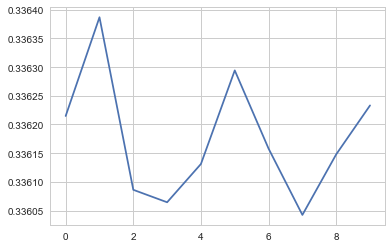

In [147]:
plt.plot(SGD_RSME_values)

In [148]:
SGD_rsme = np.average(SGD_RSME_values)

In [149]:
print(SGD_rsme)

0.33617590969683475


Text(0.5,1,'Comparison of Different Regression Algorithms on RSME')

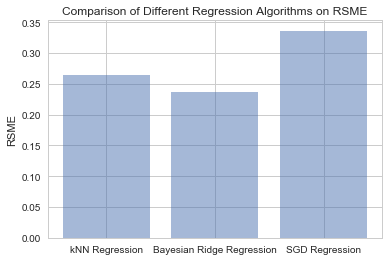

In [156]:
objects = ('kNN Regression', 'Bayesian Ridge Regression', 'SGD Regression')
y_pos = np.arange(len(objects))
performance = [kNN_rsme, bayesian_rsme, SGD_rsme]

plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RSME')
plt.title('Comparison of Different Regression Algorithms on RSME')